In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/customer_churn_analysis.csv'

df = pd.read_csv(file_path)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



*  Replacing blanks with 0 as tenure is 0 and no total charges are recorded




In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*  For check Null values use isnull for T/F

In [ ]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


*  For check sum

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


*  For check overall sum

In [ ]:
df.isnull().sum().sum()

np.int64(0)

*  For Descriptive Analysis

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


* Check  duplicates values

In [ ]:
df.duplicated().sum()

np.int64(0)

* Check duplicates values on basis of Uniqueness

In [ ]:
df["customerID"].duplicated().sum()

np.int64(0)

* To converted 0 and 1 values of senior citizen to yes/no to make it easier understad

In [ ]:
def conv(value):
  if value == 1:
    return "Yes"
  else:
    return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)


In [ ]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


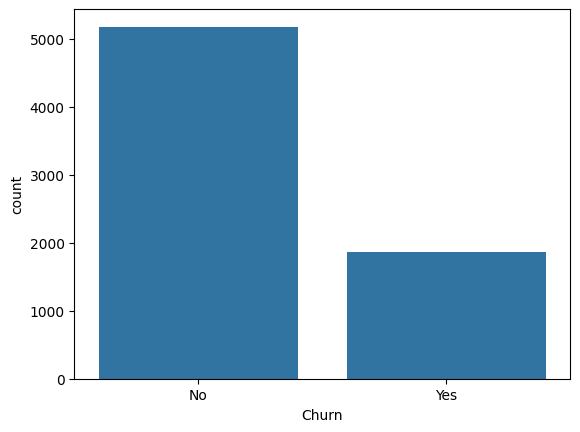

In [ ]:
sns.countplot (x = "Churn", data = df)
plt.show()

* Show ther Number of customers

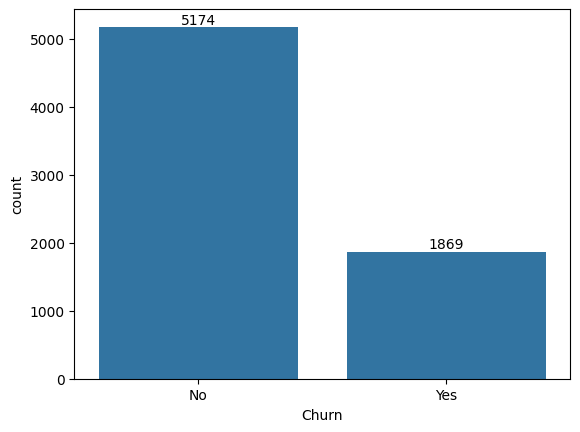

In [ ]:
ax = sns.countplot (x = "Churn", data = df)

ax.bar_label(ax.containers[0])
plt.show()

* Give Title

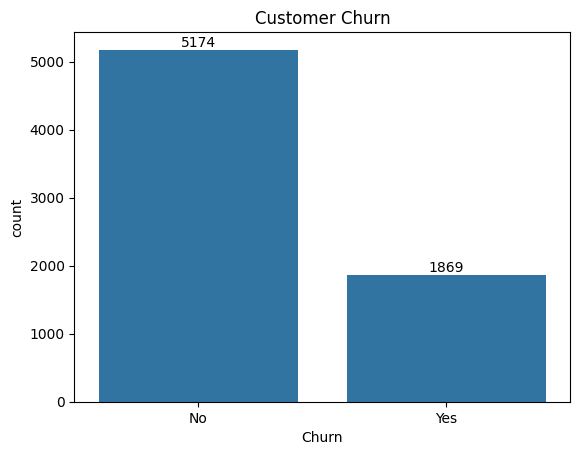

In [ ]:
ax = sns.countplot (x = "Churn", data = df)

ax.bar_label(ax.containers[0])
plt.title("Customer Churn")
plt.show()

*  Use groupby for count values in Yes/No

In [ ]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


* Show in Pie chart

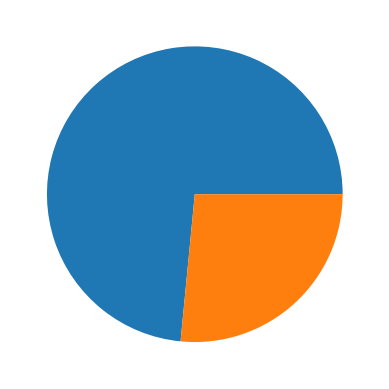

In [ ]:
plt.pie(gb["Churn"])
plt.show()

* Use labes

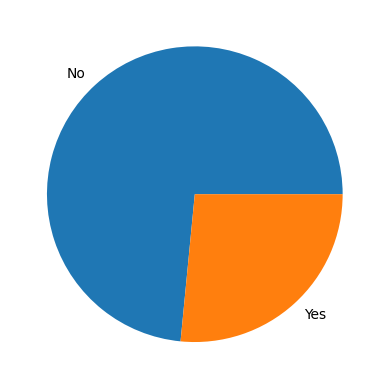

In [ ]:
plt.pie(gb ["Churn"], labels = gb.index)
plt.show()

* Use percentage

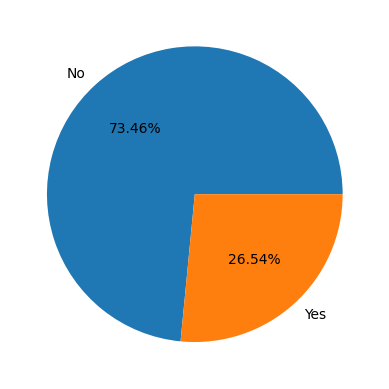

In [ ]:
plt.pie(gb ["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.show()

* Use code for reduce size + reduce font size

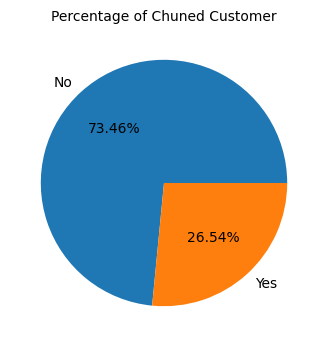

In [ ]:
plt.figure(figsize = (4,4))
plt.pie(gb ["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Chuned Customer", fontsize = 10)
plt.show()

* Count Gender

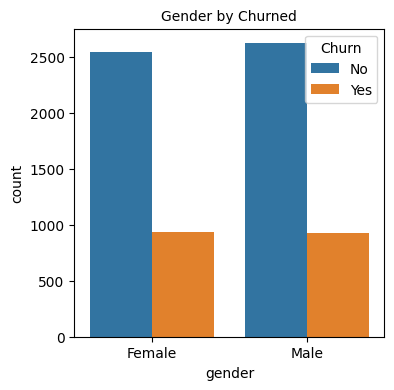

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Gender by Churned", fontsize = 10)
plt.show()

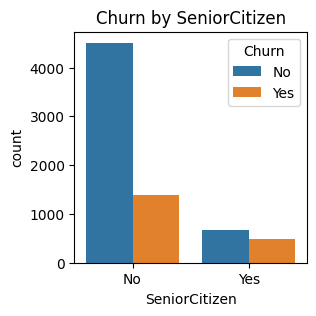

In [ ]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

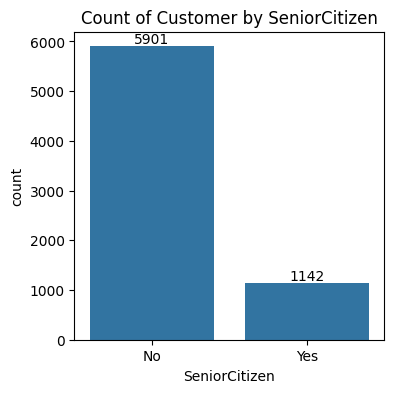

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitizen")
plt.show()

Comparative a greater percentage of people in senior citizen category have churned

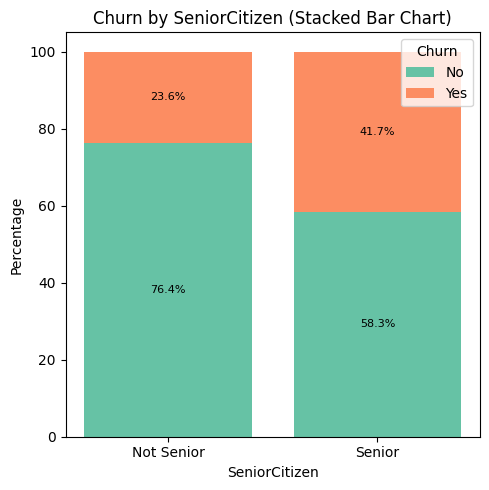

In [ ]:
# Step 1: Count how many for each SeniorCitizen and Churn combination
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages within each SeniorCitizen group (row-wise)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bars with labels
fig, ax = plt.subplots(figsize=(5, 5))
bottom = None
colors = ['#66c2a5', '#fc8d62']  # Customize colors for churn categories

for i, churn_status in enumerate(percentages.columns):
    bars = ax.bar(
        percentages.index,
        percentages[churn_status],
        bottom=bottom,
        label=churn_status,
        color=colors[i]
    )
    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{height:.1f}%',
                ha='center', va='center', fontsize=8, color='black'
            )
    bottom = percentages[churn_status] if bottom is None else bottom + percentages[churn_status]

# Final touches
ax.set_title('Churn by SeniorCitizen (Stacked Bar Chart)')
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Senior', 'Senior'])
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

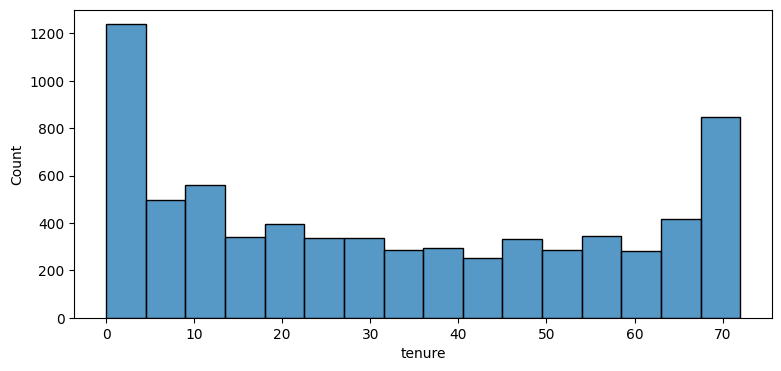

In [ ]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure",data = df)
plt.show()

* People who have used our services for a long time have stayed and people who have used our services #1or2 months have churned

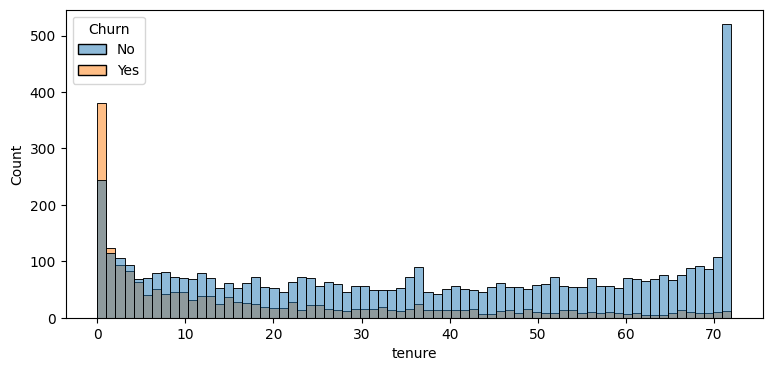

In [ ]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure",data = df, bins = 70, hue = "Churn")
plt.show()

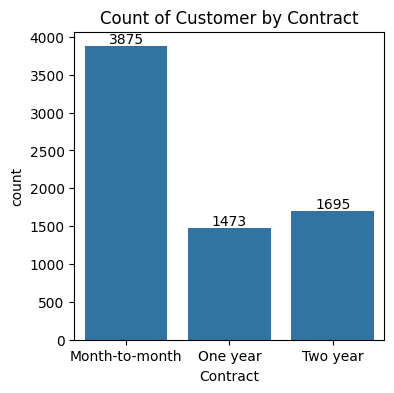

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

* People who have month to month contract are likely to churn then from those who have 1 or 2 years contract

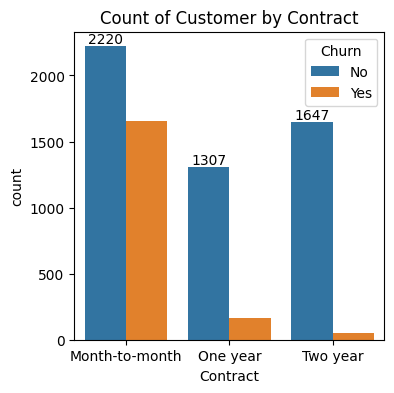

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_clean:
    df[col] = df[col].replace('No internet service', 'No')


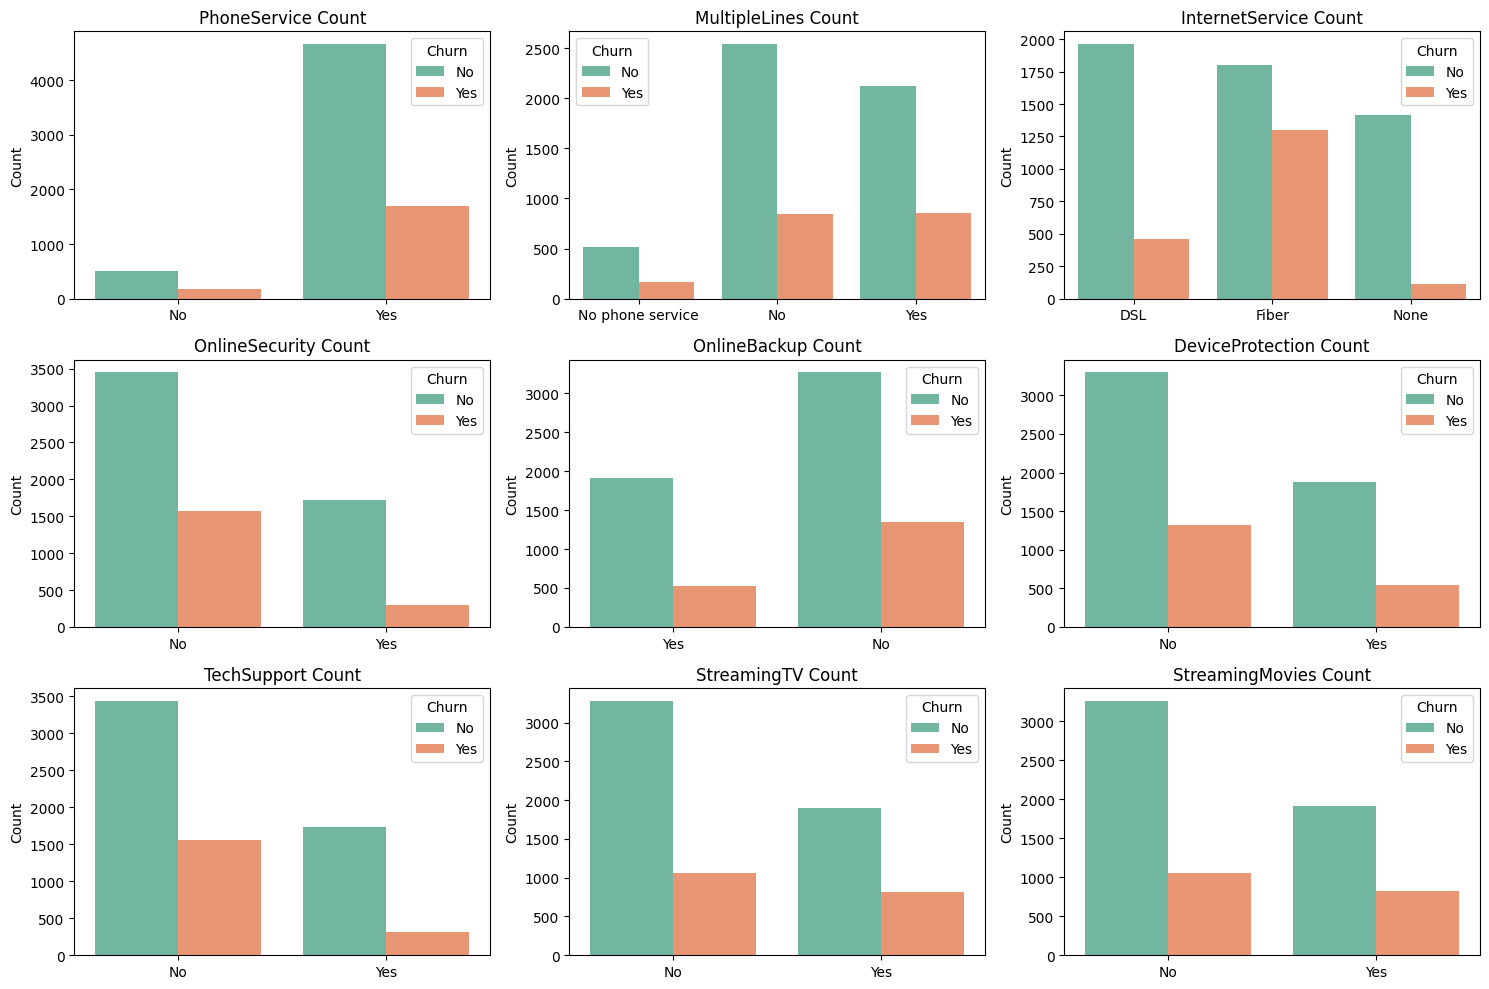

In [ ]:
# List of columns you want to plot
service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Setup subplot grid (e.g., 3 rows × 3 cols = 9 plots)
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Create a countplot for each column
for i, col in enumerate(service_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2', hue = "Churn")
    axes[i].set_title(f'{col} Count')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)  # Rotate x labels if needed

# Turn off any unused subplots (if any)
for j in range(len(service_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* The majority of customer who do not churn tend to have services like PhoneServices,InternetServices(particularly DSL) and OnlineSecurtity enabled.For services like OnlineBackup,TechSupport and StreamingTv churn rates are not noticeably higher when these services are not used or unavailable.

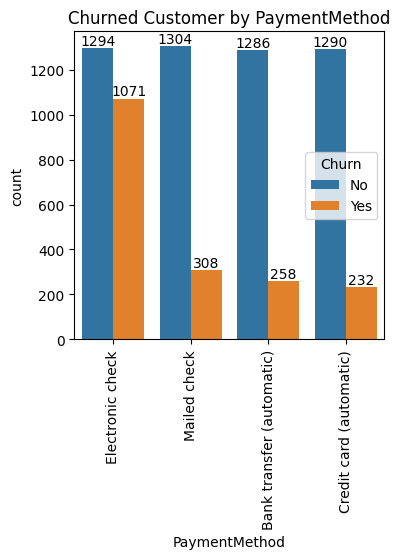

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by PaymentMethod")
plt.xticks(rotation = 45)   # We can show value of xsis
plt.show()

* Customer likely to churn when he is using electrinic check as a payment.


